<a href="https://colab.research.google.com/github/dolmarawat/NeuralNetworkAnalysis/blob/main/Dolma_CE6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Essential libraries

In [ ]:
#You only need to install once
#!pip install tensorflow

In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder # for categorical feature encoding
from sklearn.preprocessing import StandardScaler # for input normalization

from sklearn.metrics import confusion_matrix, accuracy_score # For evaluation

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import sys
# Define the path where the function.py is located
module_path = "/content/drive/MyDrive/Function"

# Add the path to sys.path
if module_path not in sys.path:
    sys.path.append(module_path)

In [ ]:
import Function as fun

In [ ]:
# Define the file path for the training data
file_path = '/content/drive/MyDrive/Data/'

## Keras Models API

In [ ]:
# Set global seeds before importing Keras so we can control later stochastic processes
# Such as data shuffling, weight initialization, and hyperparameter configurations.
import random

seed_value = 1512

# Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED'] = str(seed_value)

# Set `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# Set `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

In [ ]:
import tensorflow as tf

# Set the `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(seed_value)

# Import  Keras libraries
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Activation

from keras.optimizers import Adam, SGD

from keras import regularizers
from keras.regularizers import l2
from keras.regularizers import l1

from keras_tuner import HyperModel, Hyperband
from keras_tuner import HyperParameters

# for learning rate scheduler
from keras.callbacks import LearningRateScheduler, ReduceLROnPlateau, EarlyStopping
from keras.callbacks import Callback

In [ ]:
from keras.optimizers.schedules import ExponentialDecay

## Load data

In [ ]:
# Define the file path for the training data
file_path = '/content/drive/MyDrive/Data/'

In [ ]:
df = pd.read_csv(file_path + 'DMAGECR .csv')

In [ ]:
df.head()

,checking,duration,history,purpose,amount,savings,employed,installp,marital,coapp,resident,property,age,other,housing,existcr,job,depends,telephon,foreign,good_bad
0,1,6,4,3,1169,5,5,4,3,1,4,1,67,3,2,2,3,1,2,1,good
1,2,48,2,3,5951,1,3,2,2,1,2,1,22,3,2,1,3,1,1,1,bad
2,4,12,4,6,2096,1,4,2,3,1,3,1,49,3,2,1,2,2,1,1,good
3,1,42,2,2,7882,1,4,2,3,3,4,2,45,3,3,1,3,2,1,1,good
4,1,24,3,0,4870,1,3,3,3,1,4,4,53,3,3,2,3,2,1,1,bad


##Data Understanding

In [ ]:
df.describe()


,checking,duration,history,amount,savings,employed,installp,marital,coapp,resident,property,age,other,housing,existcr,job,depends,telephon,foreign
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,3271.258000,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.546000,2.675000,1.929000,1.407000,2.904000,1.155000,1.404000,1.037000
std,1.257638,12.058814,1.08312,2822.736876,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.375469,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856
min,1.000000,4.000000,0.00000,250.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,12.000000,2.00000,1365.500000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,2.000000,18.000000,2.00000,2319.500000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,4.000000,24.000000,4.00000,3972.250000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.000000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,18424.000000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [ ]:
df.dtypes

,0
checking,int64
duration,int64
history,int64
purpose,object
amount,int64
savings,int64
employed,int64
installp,int64
marital,int64
coapp,int64


In [ ]:
def metadata(df):
  columns_list = list(df.columns.values) # Get a list of column names
  type_list = [str(item) for item in list(df.dtypes)] # Get data types
  missing_list = [round(float(num),2) for num in list((df.isnull().sum()/len(df)*100))] # Find percentage of missing values
  unique_list = [int(nunique) for nunique in list(df.nunique())] # Find unique values for each column
  # Return basic stats for interval columns (i.e. not a category or object datatype and more than 10 unique values)
  metadata = pd.DataFrame(columns_list, columns=['column_name'])
  metadata['datatype'] = type_list
  metadata['missing_percent'] = missing_list
  metadata['unique'] = unique_list
  try:
    desc_interval = df[[item for item in columns_list if str(df[item].dtypes) != 'category' and df[item].nunique()>=10 and str(df[item].dtypes) != 'object']].describe().loc[['mean']]
    metadata = pd.merge(metadata, desc_interval, on='column_name', how='left')
  except:
    metadata
  return metadata

In [ ]:
metadata(df)

,column_name,datatype,missing_percent,unique
0,checking,int64,0.0,4
1,duration,int64,0.0,33
2,history,int64,0.0,5
3,purpose,object,0.0,10
4,amount,int64,0.0,921
5,savings,int64,0.0,5
6,employed,int64,0.0,5
7,installp,int64,0.0,4
8,marital,int64,0.0,4
9,coapp,int64,0.0,3


##Data Preparation

#Encoding categorical data

In [ ]:
# we will use LabelEncoder that encodes feature labels with value between 0 and n_classes-1.
labelencoder = LabelEncoder()

df['good_bad'] = labelencoder.fit_transform(df['good_bad'])

# Swap the labels
df['good_bad'] = df['good_bad'].apply(lambda x: 1 if x == 0 else 0)

In [ ]:
print(df['good_bad'].unique())

[0 1]


Train test split

In [ ]:
mode_value = df[df['purpose'] != 'X']['purpose'].mode()[0]

# Replace 'X' with the mode value in the 'purpose' column
df['purpose'].replace('X', mode_value, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('good_bad',axis=1),
df['good_bad'],
stratify=df['good_bad'],
test_size=0.15,
random_state=101)
print(len(X_train), len(X_test))

850 150


In [ ]:
X_train.shape

(850, 20)

#Feature normalization

In [ ]:
non_numeric_values = df['purpose'].apply(lambda x: not x.isnumeric())
df[non_numeric_values]

,checking,duration,history,purpose,amount,savings,employed,installp,marital,coapp,resident,property,age,other,housing,existcr,job,depends,telephon,foreign,good_bad


In [ ]:
df_scaler = StandardScaler()
X_train = df_scaler.fit_transform(X_train)
X_test = df_scaler.fit_transform(X_test)
X_train[:3]

array([[-0.44893155, -0.21468096,  1.35102226, -0.27991116,  1.11528205,
        -0.70078283,  1.3316958 , -0.85803203,  0.48292248, -0.2882106 ,
        -1.67131334,  1.5776231 ,  0.46526379,  0.45806303,  0.11639315,
        -0.71074996,  0.13842541, -0.42491829,  1.21281913, -0.21029989],
       [ 1.14103436,  0.29527381,  0.42491829, -0.27991116,  0.32718684,
        -0.06776965, -0.30642494, -0.85803203,  0.48292248, -0.2882106 ,
         0.1441708 , -0.32178148, -0.06309188,  0.45806303,  0.11639315,
         1.05573386,  0.13842541, -0.42491829, -0.82452526, -0.21029989],
       [-0.44893155,  1.31518334, -0.50118568,  0.86212637, -0.30293272,
        -0.70078283, -1.12548531,  0.92298684,  0.48292248, -0.2882106 ,
        -1.67131334,  1.5776231 , -0.23921044,  0.45806303, -1.78618721,
        -0.71074996, -1.38964734, -0.42491829, -0.82452526, -0.21029989]])

#Modeling

In [ ]:
model = tf.keras.Sequential()

##Add Layers

In [ ]:
# Add the input layer and the first hidden layer with 6 neurons
model.add(Dense(6, activation='relu',
kernel_initializer='he_uniform',
kernel_regularizer=regularizers.L2(0.01),
input_dim=20))
# Add the second hidden layer with with 6 neurons
model.add(Dense(6, kernel_initializer='he_uniform',
activation='relu',
kernel_regularizer=regularizers.L2(0.01)))
# Add the output layer
model.add(Dense(1, kernel_initializer='glorot_uniform',
activation ='sigmoid',
kernel_regularizer=regularizers.L2(0.01)))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │           126 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 175 (700.00 B)

 Trainable params: 175 (700.00 B)

 Non-trainable params: 0 (0.00 B)

#Train Baseline Model

In [ ]:
# Compile the ANN
model.compile(optimizer=keras.optimizers.Adam (learning_rate=0.01),
loss='binary_crossentropy', metrics=['accuracy'])
# train the model
model_baseline = model.fit(X_train, y_train, validation_split=0.15,
batch_size=32, epochs=50)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3803 - loss: 1.1248 - val_accuracy: 0.6172 - val_loss: 0.8285
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6872 - loss: 0.7974 - val_accuracy: 0.6641 - val_loss: 0.7441
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7110 - loss: 0.7146 - val_accuracy: 0.6719 - val_loss: 0.7001
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7129 - loss: 0.6660 - val_accuracy: 0.6719 - val_loss: 0.6739
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7263 - loss: 0.6320 - val_accuracy: 0.6562 - val_loss: 0.6551
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7668 - loss: 0.5967 - val_accuracy: 0.7109 - val_loss: 0.6355
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7850 - loss: 0.5572 - val_accuracy: 0.7109 - val_loss: 0.6246
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7906 - loss: 0.5189 - val_accuracy: 0.7031 - val_lo

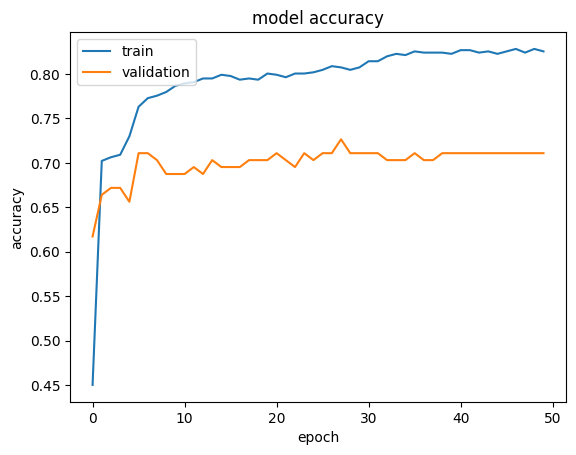

In [ ]:
# Plot the accuracy history
plt.plot(model_baseline.history['accuracy'])
plt.plot(model_baseline.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

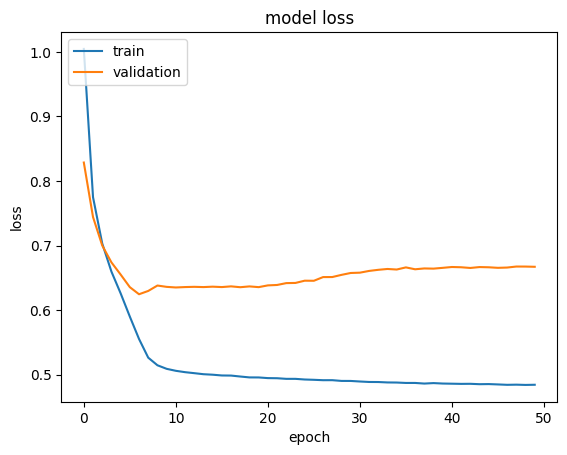

In [ ]:
# Plot the loss history
# It seems that loss plateaued at 20 epochs
plt.plot(model_baseline.history['loss'])
plt.plot(model_baseline.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Hyperband Tuner

In [ ]:
class MyHyperModel(HyperModel):
  def __init__(self, input_dim):
    self.input_dim = input_dim
  def build(self, hp):
    model = Sequential()

    # Define the type of regularization
    reg_type = hp.Choice('regularization_type', ['l1', 'l2'])

    if reg_type == 'l1':
      regularizer = l1(hp.Float('l1_value', min_value=1e-5,
    max_value=1e-2, sampling='log'))
    else:
      regularizer = l2(hp.Float('l2_value', min_value=1e-5,
    max_value=1e-2, sampling='log'))

    model.add(Dense(6,
                    activation='relu',
                    kernel_initializer='he_uniform',
                    kernel_regularizer=regularizer,
                    input_dim = self.input_dim))
    model.add(Dense(6,
                    kernel_initializer='he_uniform',
                    kernel_regularizer=regularizer,
                    activation='relu'))
    model.add(Dense(1,
                    kernel_initializer='glorot_uniform',
                    kernel_regularizer=regularizer,
                    activation = 'sigmoid'))

    # Configure optimizer
    optimizer_name = hp.Choice('optimizer', ['adam', 'sgd'])

    # Set different learning rates
    learning_rate = hp.Choice('learning_rate', values=[1e-4,1e-3,1e-2,1e-1])
    if optimizer_name == 'adam':
      optimizer = Adam(learning_rate=learning_rate)
    else:
      optimizer = SGD(learning_rate=learning_rate)

    # Choose the loss function
    loss_function = hp.Choice('loss_function',
    ['binary_crossentropy', 'poisson'])

    # Compile the model
    model.compile(optimizer=optimizer, loss=loss_function,
                  metrics=['accuracy'])
    return model

In [ ]:
input_dim = 20
hypermodel = MyHyperModel(input_dim=input_dim)
tuner = Hyperband(
hypermodel,
objective='val_accuracy',
max_epochs=40, # Set this to a value higher than the expected epochs to ensure convergence.
factor=3
)

In [ ]:
# Check elspased time before running
tuner.search(X_train, y_train,
            validation_split=0.15)

Trial 90 Complete [00h 00m 13s]
val_accuracy: 0.671875

Best val_accuracy So Far: 0.75
Total elapsed time: 00h 06m 37s


In [ ]:
# Check the summary of the best 10 trials
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0082 summary
Hyperparameters:
regularization_type: l2
l1_value: 0.0015377671436367724
optimizer: adam
learning_rate: 0.01
loss_function: binary_crossentropy
l2_value: 0.00013875795729191554
tuner/epochs: 40
tuner/initial_epoch: 14
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0077
Score: 0.75

Trial 0069 summary
Hyperparameters:
regularization_type: l2
l1_value: 0.0020699691101050224
optimizer: adam
learning_rate: 0.1
loss_function: binary_crossentropy
l2_value: 6.714803945207538e-05
tuner/epochs: 14
tuner/initial_epoch: 5
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0060
Score: 0.7421875

Trial 0072 summary
Hyperparameters:
regularization_type: l2
l1_value: 0.0020699691101050224
optimizer: adam
learning_rate: 0.1
loss_function: binary_crossentropy
l2_value: 6.714803945207538e-05
tuner/epochs: 40
tuner/initial_epoch: 14
tuner/bracket: 2
tuner/round: 2
tuner/t

In [ ]:
# chech model accuracy on test data
best_model = tuner.get_best_models(num_models=1)[0]
loss, accuracy = best_model.evaluate(X_test, y_test)
print(accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7678 - loss: 0.5616 
0.7733333110809326


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The best regularizer for the optimizer: {best_hps.get('regularization_type')}
The best L1 value: {best_hps.get('l1_value')}
The best L2 value: {best_hps.get('l2_value')}
The best learning rate for the optimizer: {best_hps.get('learning_rate')}
The best optimizer: {best_hps.get('optimizer')}
The best loss function: {best_hps.get('loss_function')}
""")


The best regularizer for the optimizer: l2
The best L1 value: 0.0015377671436367724
The best L2 value: 0.00013875795729191554
The best learning rate for the optimizer: 0.01
The best optimizer: adam
The best loss function: binary_crossentropy



#Further tuning


###ADAM_32_TS

In [ ]:
# Define model architecture
model = tf.keras.Sequential()

# Add the input layer and the first hidden layer with 6 neurons
model.add(Dense(6, activation='relu',
                kernel_initializer='he_uniform',
                kernel_regularizer=regularizers.L1(5e-05),
                input_dim=20))

# Add the second hidden layer with with 6 neurons
model.add(Dense(6, kernel_initializer='he_uniform',
                activation='relu',
                kernel_regularizer=regularizers.L1(5e-05)))

# Add the output layer
model.add(Dense(1, kernel_initializer='glorot_uniform',
                activation ='sigmoid',
                kernel_regularizer=regularizers.L2(5e-05)))

In [ ]:
ADAM_32_TS = model

ADAM_32_TS.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 6)              │           126 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 175 (700.00 B)

 Trainable params: 175 (700.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model with an initial learning rate
initial_learning_rate = 0.01
optimizer = Adam(learning_rate=initial_learning_rate)
ADAM_32_TS.compile(optimizer=optimizer, loss='binary_crossentropy',
metrics=['accuracy'])

In [ ]:
# Define the time-based learning rate schedule function
def lr_time_based_decay(epoch, lr):
  decay = initial_learning_rate / epochs
  new_lr = lr - decay
  return new_lr

epochs = 40

# Create a LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_time_based_decay, verbose=1)

# Train the model with the learning rate scheduler callback
ADAM_32_TS_model = ADAM_32_TS.fit(X_train, y_train, epochs=epochs,
                                  validation_split=0.15,
                                  batch_size=32,
                                  callbacks=[lr_scheduler])


Epoch 1: LearningRateScheduler setting learning rate to 0.009749999776482582.
Epoch 1/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5073 - loss: 0.7931 - val_accuracy: 0.6484 - val_loss: 0.6620 - learning_rate: 0.0098

Epoch 2: LearningRateScheduler setting learning rate to 0.009500000201165676.
Epoch 2/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7164 - loss: 0.5278 - val_accuracy: 0.6406 - val_loss: 0.6211 - learning_rate: 0.0095

Epoch 3: LearningRateScheduler setting learning rate to 0.00925000062584877.
Epoch 3/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7281 - loss: 0.4907 - val_accuracy: 0.6562 - val_loss: 0.5931 - learning_rate: 0.0093

Epoch 4: LearningRateScheduler setting learning rate to 0.009000001050531864.
Epoch 4/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7416 - loss: 0.4691 - val_accuracy: 0.7031 - val_loss: 0.5859 - learning_rate: 0.0090

Epoch 5: LearningRateScheduler setting learning rate to 0.008750001475214958.
Epoch

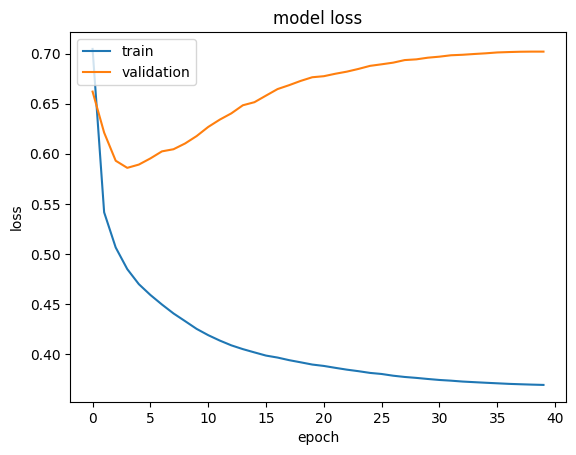

In [ ]:
plt.plot(ADAM_32_TS_model.history['loss'])
plt.plot(ADAM_32_TS_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

####Test Confusion Matrix

In [ ]:
y_pred_ADAM_32_TS = ADAM_32_TS.predict(X_test)
cm_ADAM_32_TS = confusion_matrix(y_test, y_pred_ADAM_32_TS.round())
print(accuracy_score(y_test,y_pred_ADAM_32_TS.round()))
print(cm_ADAM_32_TS)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
0.7133333333333334
[[84 21]
 [22 23]]


###ADAM_32_SD

In [ ]:
# Define model architecture
model = tf.keras.Sequential()

# Add the input layer and the first hidden layer with 6 neurons
model.add(Dense(6, activation='relu',
                kernel_initializer='he_uniform',
                kernel_regularizer=regularizers.L1(5e-05),
                input_dim=20))

# Add the second hidden layer with with 6 neurons
model.add(Dense(6, kernel_initializer='he_uniform',
                activation='relu',
                kernel_regularizer=regularizers.L1(5e-05)))

# Add the output layer
model.add(Dense(1, kernel_initializer='glorot_uniform',
                activation ='sigmoid',
                kernel_regularizer=regularizers.L2(5e-05)))

In [ ]:
ADAM_32_SD = model

In [ ]:
# Compile the model with an initial learning rate
initial_learning_rate = 0.01

optimizer = Adam(learning_rate=initial_learning_rate)

ADAM_32_SD.compile(optimizer=optimizer, loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
# define step decay function
def step_decay(epoch):
  initial_lr = 0.06
  drop = 0.5 # reduce learning rate by half
  epochs_drop = 10 # step size
  lr = initial_lr * np.power(drop, np.floor((epoch)/epochs_drop))
  return lr

# create a custom callback by extending the keras.callbacks.Callback class.
class LossHistory(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.losses = []
    self.lr = []

  def on_epoch_end(self, batch, logs={}):
    self.losses.append(logs.get('loss'))
    self.lr.append(step_decay(len(self.losses)))
    print('lr:', step_decay(len(self.losses)))

# Create a callback list consisting of LearningRateScheduler callback and custom callback
SD_loss_history = LossHistory()
SD_lrate = LearningRateScheduler(step_decay)
SD_callbacks_list = [SD_loss_history, SD_lrate]

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
  monitor='val_loss', # Monitor validation loss
  patience=10, # Number of epochs with no improvement for early stopping
  verbose=1, # Log when training is stopped
  restore_best_weights=True) # Restore model weights from the epoch with the best value of validation loss

In [ ]:
# fit the model
ADAM_32_SD_model = ADAM_32_SD.fit(X_train, y_train,
validation_split=0.15,
epochs=50,
batch_size=32,
callbacks=[SD_callbacks_list, early_stopping],
verbose=1)

Epoch 1/50
 1/23 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.1875 - loss: 1.1893lr: 0.06
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5875 - loss: 0.7225 - val_accuracy: 0.6953 - val_loss: 0.5720 - learning_rate: 0.0600
Epoch 2/50
 1/23 ━━━━━━━━━━━━━━━━━━━━ 6s 300ms/step - accuracy: 0.8438 - loss: 0.4833lr: 0.06
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7706 - loss: 0.4981 - val_accuracy: 0.6797 - val_loss: 0.5920 - learning_rate: 0.0600
Epoch 3/50
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8750 - loss: 0.3795lr: 0.06
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7942 - loss: 0.4472 - val_accuracy: 0.6641 - val_loss: 0.6038 - learning_rate: 0.0600
Epoch 4/50
16/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8082 - loss: 0.4289 lr: 0.06
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8033 - loss: 0.4317 - val_accuracy: 0.6562 - val_loss: 0.6133 - learning_rate: 0.0600
Epoch 5/50
20/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8040 - 

In [ ]:
# If SD_loss_history.lr is a list, extend it with None values
if len(SD_loss_history.lr) < 32:
    SD_loss_history.lr.extend([None] * (32 - len(SD_loss_history.lr)))
# If SD_loss_history.lr is a numpy array, resize it
elif isinstance(SD_loss_history.lr, np.ndarray):
    SD_loss_history.lr = np.resize(SD_loss_history.lr, 32)

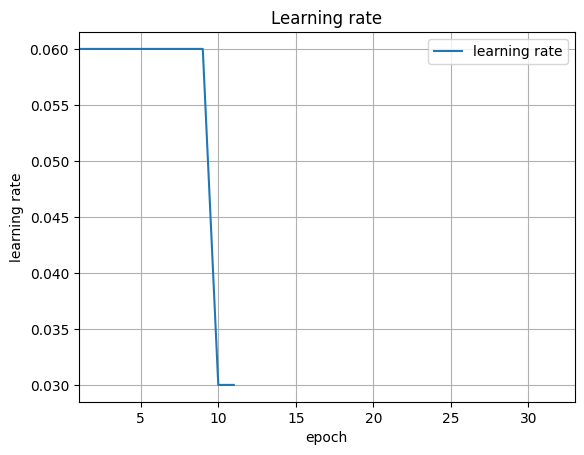

In [ ]:
# plot learning rate
fig = plt.figure()
# 13 is based on previous early stopping
plt.plot(range(1,33),SD_loss_history.lr,label='learning rate')
plt.xlabel("epoch")
plt.xlim([1,33])
plt.ylabel("learning rate")
plt.legend(loc=0)
plt.grid(True)
plt.title("Learning rate")
plt.show()

####Test Confusion Matrix

In [ ]:
y_pred_ADAM_32_SD = ADAM_32_SD.predict(X_test)
cm_ADAM_32_SD = confusion_matrix(y_test, y_pred_ADAM_32_SD.round())
print(accuracy_score(y_test,y_pred_ADAM_32_SD.round()))
print(cm_ADAM_32_SD)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
0.74
[[101   4]
 [ 35  10]]


###ADAM_32_ES

In [ ]:
# Define model architecture
model = tf.keras.Sequential()

# Add the input layer and the first hidden layer with 6 neurons
model.add(Dense(6, activation='relu',
                kernel_initializer='he_uniform',
                kernel_regularizer=regularizers.L1(5e-05),
                input_dim=20))

# Add the second hidden layer with with 6 neurons
model.add(Dense(6, kernel_initializer='he_uniform',
                activation='relu',
                kernel_regularizer=regularizers.L1(5e-05)))

# Add the output layer
model.add(Dense(1, kernel_initializer='glorot_uniform',
                activation ='sigmoid',
                kernel_regularizer=regularizers.L2(5e-05)))

In [ ]:
ADAM_32_ES = model

# ADAM_32_ES.summary()

In [ ]:
initial_learning_rate = 0.01
decay_steps = 250
decay_rate = 0.96
staircase = False

lr_schedule = ExponentialDecay(
  initial_learning_rate=initial_learning_rate,
  decay_steps=decay_steps,
  decay_rate=decay_rate,
  staircase=staircase
)

In [ ]:
# Compile the model with an initial learning rate
optimizer = Adam(learning_rate=lr_schedule)

ADAM_32_ES.compile(optimizer=optimizer, loss='binary_crossentropy',
  metrics=['accuracy'])

In [ ]:
ADAM_32_ES_model = ADAM_32_ES.fit(X_train, y_train, epochs=50,
                                  validation_split=0.15,
                                  batch_size=32,
                                  callbacks=[early_stopping])

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5926 - loss: 0.7305 - val_accuracy: 0.6953 - val_loss: 0.6191
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7820 - loss: 0.4927 - val_accuracy: 0.6875 - val_loss: 0.5910
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7945 - loss: 0.4578 - val_accuracy: 0.6797 - val_loss: 0.6147
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8161 - loss: 0.4356 - val_accuracy: 0.6953 - val_loss: 0.6275
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8182 - loss: 0.4242 - val_accuracy: 0.7031 - val_loss: 0.6318
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8200 - loss: 0.4149 - val_accuracy: 0.7109 - val_loss: 0.6346
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8213 - loss: 0.4071 - val_accuracy: 0.7109 - val_loss: 0.6457
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8223 - loss: 0.3990 - val_accuracy: 0.7109 - val_los

In [ ]:
current_lr = lr_schedule(ADAM_32_ES.optimizer.iterations)
print(f"Current learning rate: {current_lr.numpy()}")

Current learning rate: 0.009559329599142075


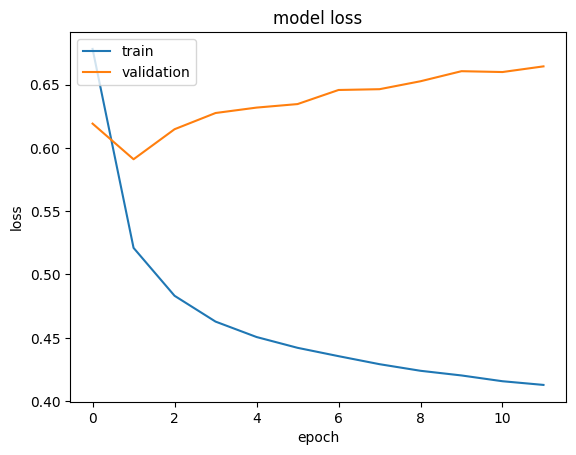

In [ ]:
plt.plot(ADAM_32_ES_model.history['loss'])
plt.plot(ADAM_32_ES_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

####Test Confusion Matrix

In [ ]:
y_pred_ADAM_32_ES = ADAM_32_ES.predict(X_test)
cm_ADAM_32_ES = confusion_matrix(y_test, y_pred_ADAM_32_ES.round())
print(accuracy_score(y_test,y_pred_ADAM_32_ES.round()))
print(cm_ADAM_32_ES)

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
0.7666666666666667
[[90 15]
 [20 25]]


###ADAM_32_RP

In [ ]:
# Define model architecture
model = tf.keras.Sequential()

# Add the input layer and the first hidden layer with 6 neurons
model.add(Dense(6, activation='relu',
                kernel_initializer='he_uniform',
                kernel_regularizer=regularizers.L1(5e-05),
                input_dim=20))

# Add the second hidden layer with with 6 neurons
model.add(Dense(6, kernel_initializer='he_uniform',
                activation='relu',
                kernel_regularizer=regularizers.L1(5e-05)))

# Add the output layer
model.add(Dense(1, kernel_initializer='glorot_uniform',
                activation ='sigmoid',
                kernel_regularizer=regularizers.L2(5e-05)))

In [ ]:
ADAM_32_RP = model

In [ ]:
# Compile the model with an initial learning rate
initial_learning_rate = 0.01

optimizer = Adam(learning_rate=initial_learning_rate)

ADAM_32_RP.compile(optimizer=optimizer, loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
class LrHistory(Callback):
  def on_epoch_begin(self, epoch, logs=None):
    if logs is None:
      logs = {}
    # feture the current learning rate
    logs['lr'] = self.model.optimizer.learning_rate.numpy()

In [ ]:
# Configure the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
  monitor='val_loss', # Metric to be monitored
  factor=0.2, # Factor by which the learning rate will be reduced. new_lr = lr * factor
  patience=5, # Number of epochs with no improvement after which learning rate will be reduced
  min_lr=0.001, # Lower bound on the learning rate
  verbose=1) # Print messages when the callback takes action

# Include learning rate history
lr_history = LrHistory()

In [ ]:
# Train the model with the learning rate scheduler callback
ADAM_32_RP_model = ADAM_32_RP.fit(X_train, y_train, epochs=50,
                                  validation_split=0.15,
                                  batch_size=32,
                                  callbacks=[reduce_lr,lr_history,
                                              early_stopping])

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6080 - loss: 0.6649 - val_accuracy: 0.6641 - val_loss: 0.6202 - learning_rate: 0.0100
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7099 - loss: 0.5276 - val_accuracy: 0.6641 - val_loss: 0.5853 - learning_rate: 0.0100
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7166 - loss: 0.5010 - val_accuracy: 0.6797 - val_loss: 0.5824 - learning_rate: 0.0100
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7292 - loss: 0.4736 - val_accuracy: 0.7188 - val_loss: 0.5768 - learning_rate: 0.0100
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7812 - loss: 0.4571 - val_accuracy: 0.7266 - val_loss: 0.5760 - learning_rate: 0.0100
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7916 - loss: 0.4465 - val_accuracy: 0.7188 - val_loss: 0.5811 - learning_rate: 0.0100
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7970 - loss: 0.4347 - val_accuracy:

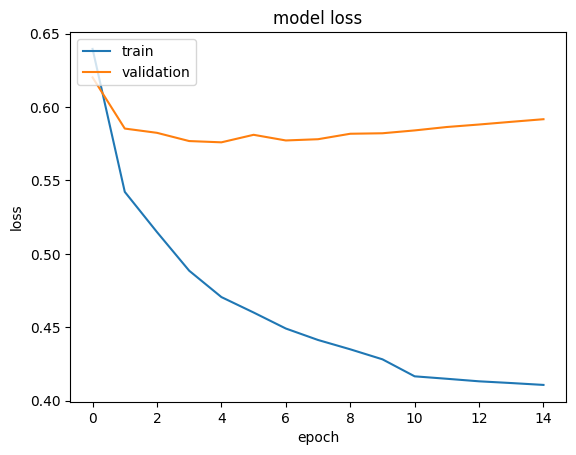

In [ ]:
plt.plot(ADAM_32_RP_model.history['loss'])
plt.plot(ADAM_32_RP_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
class LRHistory(Callback):
    def __init__(self):
        super().__init__()
        self.learning_rates = []

    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer.learning_rate.numpy()
        self.learning_rates.append(lr)

In [ ]:
# Assuming ADAM_32_RP is your compiled Keras model
lr_history = LRHistory()

history = ADAM_32_RP.fit( # Changed ADAM_32_RP_model to ADAM_32_RP
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.15,
    callbacks=[reduce_lr, lr_history, early_stopping]
)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7920 - loss: 0.4445 - val_accuracy: 0.7266 - val_loss: 0.5763 - learning_rate: 0.0010
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7911 - loss: 0.4432 - val_accuracy: 0.7266 - val_loss: 0.5769 - learning_rate: 0.0010
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7921 - loss: 0.4419 - val_accuracy: 0.7266 - val_loss: 0.5772 - learning_rate: 0.0010
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7934 - loss: 0.4406 - val_accuracy: 0.7266 - val_loss: 0.5775 - learning_rate: 0.0010
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7934 - loss: 0.4393 - val_accuracy: 0.7266 - val_loss: 0.5778 - learning_rate: 0.0010
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7925 - loss: 0.4380 - val_accuracy: 0.7266 - val_loss: 0.5781 - learning_rate: 0.0010
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7925 - loss: 0.4367 - val_accuracy: 

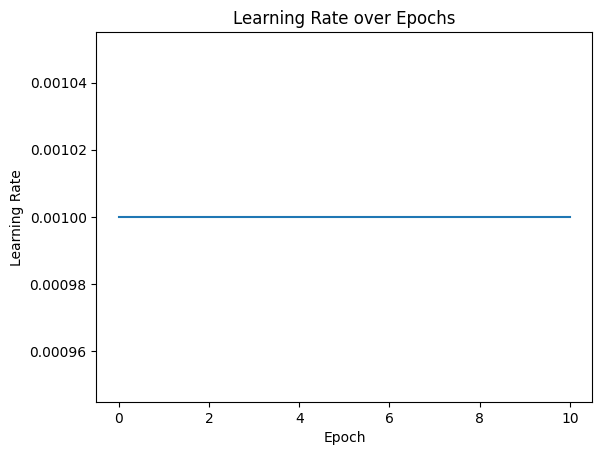

In [ ]:
plt.plot(lr_history.learning_rates)
plt.title('Learning Rate over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()

####Test Confusion Matrix

In [ ]:
y_pred_ADAM_32_RP = ADAM_32_RP.predict(X_test)
cm_ADAM_32_RP = confusion_matrix(y_test, y_pred_ADAM_32_RP.round())
print(accuracy_score(y_test,y_pred_ADAM_32_RP.round()))
print(cm_ADAM_32_RP)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0.7733333333333333
[[90 15]
 [19 26]]


###ADAM_32_01

In [ ]:
# Define model architecture
model = tf.keras.Sequential()

# Add the input layer and the first hidden layer with 6 neurons
model.add(Dense(6, activation='relu',
                kernel_initializer='he_uniform',
                kernel_regularizer=regularizers.L1(5e-05),
                input_dim=20))

# Add the second hidden layer with with 6 neurons
model.add(Dense(6, kernel_initializer='he_uniform',
                activation='relu',
                kernel_regularizer=regularizers.L1(5e-05)))

# Add the output layer
model.add(Dense(1, kernel_initializer='glorot_uniform',
                activation ='sigmoid',
                kernel_regularizer=regularizers.L2(5e-05)))

In [ ]:
ADAM_32_01 = model

# ADAM_32_01.summary()

In [ ]:
# Compile the model with an initial learning rate
optimizer = Adam(learning_rate=0.01)

ADAM_32_01.compile(optimizer=optimizer, loss='binary_crossentropy',
                    metrics=['accuracy'])

In [ ]:
ADAM_32_01_model = ADAM_32_01.fit(X_train, y_train, epochs=40,
                                  validation_split=0.15,
                                  batch_size=32)

Epoch 1/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6233 - loss: 0.6751 - val_accuracy: 0.6641 - val_loss: 0.6587
Epoch 2/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7285 - loss: 0.5667 - val_accuracy: 0.6797 - val_loss: 0.6284
Epoch 3/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7345 - loss: 0.5193 - val_accuracy: 0.6719 - val_loss: 0.6073
Epoch 4/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7703 - loss: 0.4784 - val_accuracy: 0.6719 - val_loss: 0.6074
Epoch 5/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7781 - loss: 0.4473 - val_accuracy: 0.6797 - val_loss: 0.6280
Epoch 6/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7789 - loss: 0.4302 - val_accuracy: 0.6875 - val_loss: 0.6444
Epoch 7/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7882 - loss: 0.4165 - val_accuracy: 0.6719 - val_loss: 0.6524
Epoch 8/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8007 - loss: 0.4050 - val_accuracy: 0.6719 - val_loss

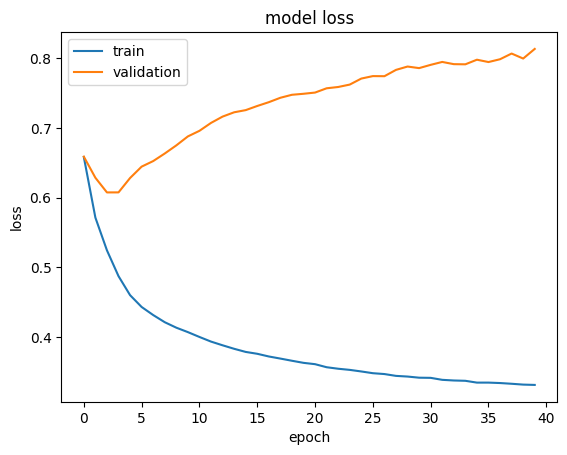

In [ ]:
plt.plot(ADAM_32_01_model.history['loss'])
plt.plot(ADAM_32_01_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

####Test Confusion Matrix

In [ ]:
y_pred_ADAM_32_01 = ADAM_32_01.predict(X_test)
cm_ADAM_32_01 = confusion_matrix(y_test, y_pred_ADAM_32_01.round())
print(accuracy_score(y_test,y_pred_ADAM_32_01.round()))
print(cm_ADAM_32_01)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0.76
[[92 13]
 [23 22]]


###ADAM_64_01

In [ ]:
# Define model architecture
model = tf.keras.Sequential()

# Add the input layer and the first hidden layer with 6 neurons
model.add(Dense(6, activation='relu',
          kernel_initializer='he_uniform',
          kernel_regularizer=regularizers.L1(5e-05),
          input_dim=20))

# Add the second hidden layer with with 6 neurons
model.add(Dense(6, kernel_initializer='he_uniform',
          activation='relu',
          kernel_regularizer=regularizers.L1(5e-05)))

# Add the output layer
model.add(Dense(1, kernel_initializer='glorot_uniform',
                activation ='sigmoid',
                kernel_regularizer=regularizers.L2(5e-05)))

In [ ]:
ADAM_64_01 = model

ADAM_64_01.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 6)              │           126 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 175 (700.00 B)

 Trainable params: 175 (700.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model with an initial learning rate
optimizer = Adam(learning_rate=0.01)

ADAM_64_01.compile(optimizer=optimizer, loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
ADAM_64_01_model = ADAM_64_01.fit(X_train, y_train, epochs=40,
                                  validation_split=0.15,
                                  batch_size=64)

Epoch 1/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6352 - loss: 0.6601 - val_accuracy: 0.6641 - val_loss: 0.6299
Epoch 2/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7157 - loss: 0.5588 - val_accuracy: 0.6875 - val_loss: 0.6055
Epoch 3/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7207 - loss: 0.5346 - val_accuracy: 0.6797 - val_loss: 0.5954
Epoch 4/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7235 - loss: 0.5138 - val_accuracy: 0.6719 - val_loss: 0.5900
Epoch 5/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7420 - loss: 0.4937 - val_accuracy: 0.6953 - val_loss: 0.5903
Epoch 6/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7548 - loss: 0.4771 - val_accuracy: 0.7109 - val_loss: 0.5916
Epoch 7/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7684 - loss: 0.4660 - val_accuracy: 0.6953 - val_loss: 0.5929
Epoch 8/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7702 - loss: 0.4571 - val_accuracy: 0.6875 - val_loss

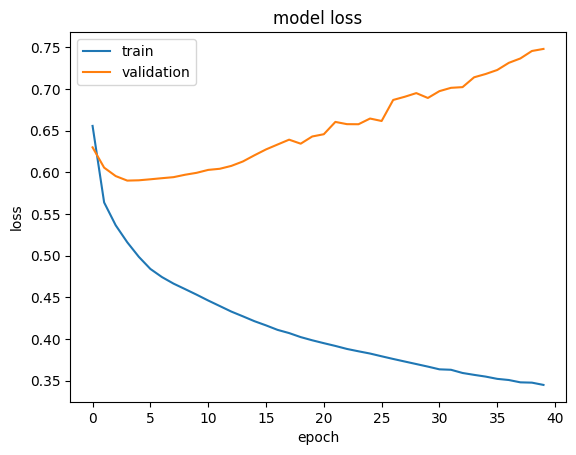

In [ ]:
plt.plot(ADAM_64_01_model.history['loss'])
plt.plot(ADAM_64_01_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

####Test Confusion Matrix

In [ ]:
y_pred_ADAM_64_01 = ADAM_64_01.predict(X_test)
cm_ADAM_64_01 = confusion_matrix(y_test, y_pred_ADAM_64_01.round())
print(accuracy_score(y_test,y_pred_ADAM_64_01.round()))
print(cm_ADAM_64_01)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
0.7533333333333333
[[91 14]
 [23 22]]


###SGD_32_01

In [ ]:
# Define model architecture
model = tf.keras.Sequential()

# Add the input layer and the first hidden layer with 6 neurons
model.add(Dense(6, activation='relu',
          kernel_initializer='he_uniform',
          kernel_regularizer=regularizers.L1(5e-05),
          input_dim=20))

# Add the second hidden layer with with 6 neurons
model.add(Dense(6, kernel_initializer='he_uniform',
          activation='relu',
          kernel_regularizer=regularizers.L1(5e-05)))

# Add the output layer
model.add(Dense(1, kernel_initializer='glorot_uniform',
          activation ='sigmoid',
          kernel_regularizer=regularizers.L2(5e-05)))

In [ ]:
SGD_32_01 = model

SGD_32_01.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 6)              │           126 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 175 (700.00 B)

 Trainable params: 175 (700.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# SGD optimizer with momentum
optimizer = SGD(learning_rate=0.01, momentum=0.9)

SGD_32_01.compile(optimizer=optimizer, loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
SGD_32_01_model = SGD_32_01.fit(X_train, y_train, epochs=40,
                                validation_split=0.15,
                                batch_size=32)

Epoch 1/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4727 - loss: 0.8215 - val_accuracy: 0.6562 - val_loss: 0.6544
Epoch 2/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7076 - loss: 0.6185 - val_accuracy: 0.6641 - val_loss: 0.6439
Epoch 3/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7126 - loss: 0.5962 - val_accuracy: 0.6641 - val_loss: 0.6420
Epoch 4/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7126 - loss: 0.5845 - val_accuracy: 0.6641 - val_loss: 0.6394
Epoch 5/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7126 - loss: 0.5738 - val_accuracy: 0.6641 - val_loss: 0.6359
Epoch 6/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7126 - loss: 0.5625 - val_accuracy: 0.6641 - val_loss: 0.6338
Epoch 7/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7126 - loss: 0.5513 - val_accuracy: 0.6641 - val_loss: 0.6348
Epoch 8/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7126 - loss: 0.5401 - val_accuracy: 0.6641 - val_los

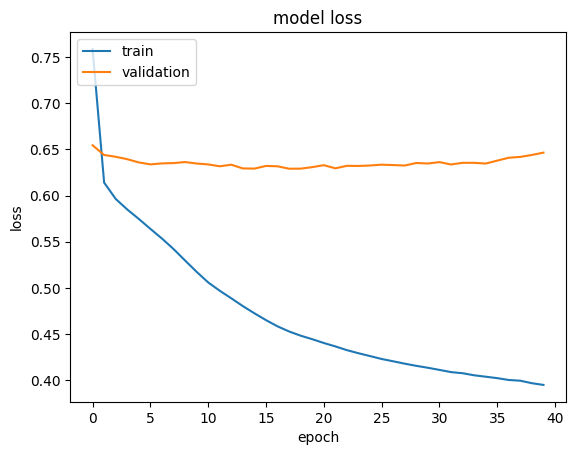

In [ ]:
plt.plot(SGD_32_01_model.history['loss'])
plt.plot(SGD_32_01_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

####Test Confusion Matrix

In [ ]:
y_pred_SGD_32_01 = SGD_32_01.predict(X_test)
cm_SGD_32_01 = confusion_matrix(y_test, y_pred_SGD_32_01.round())
print(accuracy_score(y_test,y_pred_SGD_32_01.round()))
print(cm_SGD_32_01)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
0.76
[[91 14]
 [22 23]]


###SGD_32_RP

In [ ]:
# Define model architecture
model = tf.keras.Sequential()

# Add the input layer and the first hidden layer with 6 neurons
model.add(Dense(6, activation='relu',
                kernel_initializer='he_uniform',
                kernel_regularizer=regularizers.L1(5e-05),
                input_dim=20))

# Add the second hidden layer with with 6 neurons
model.add(Dense(6, kernel_initializer='he_uniform',
          activation='relu',
          kernel_regularizer=regularizers.L1(5e-05)))

# Add the output layer
model.add(Dense(1, kernel_initializer='glorot_uniform',
          activation ='sigmoid',
          kernel_regularizer=regularizers.L2(5e-05)))

In [ ]:
SGD_32_RP = model

# SGD_32_RP.summary()

In [ ]:
# SGD optimizer with momentum
initial_learning_rate = 0.01

optimizer = SGD(learning_rate=initial_learning_rate, momentum=0.9)

SGD_32_RP.compile(optimizer=optimizer, loss='binary_crossentropy',
                  metrics=['accuracy'])

Epoch 1/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6762 - loss: 0.6471 - val_accuracy: 0.6484 - val_loss: 0.6509
Epoch 2/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7204 - loss: 0.5955 - val_accuracy: 0.6719 - val_loss: 0.6315
Epoch 3/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7299 - loss: 0.5646 - val_accuracy: 0.6719 - val_loss: 0.6171
Epoch 4/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7431 - loss: 0.5431 - val_accuracy: 0.6719 - val_loss: 0.6051
Epoch 5/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7438 - loss: 0.5249 - val_accuracy: 0.7031 - val_loss: 0.5970
Epoch 6/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7553 - loss: 0.5088 - val_accuracy: 0.7109 - val_loss: 0.5953
Epoch 7/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7720 - loss: 0.4950 - val_accuracy: 0.7188 - val_loss: 0.5973
Epoch 8/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7736 - loss: 0.4841 - val_accuracy: 0.7109 - val_loss

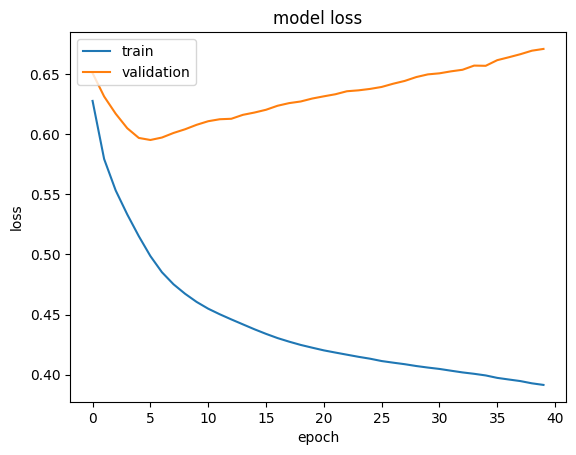

In [ ]:
# Assuming SGD_32_RP is your compiled Keras model
SGD_32_RP_model = SGD_32_RP.fit(X_train, y_train, epochs=40,
                                validation_split=0.15,
                                batch_size=32)

plt.plot(SGD_32_RP_model.history['loss'])
plt.plot(SGD_32_RP_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

####Test Confusion Matrix

In [ ]:
y_pred_SGD_32_RP = SGD_32_RP.predict(X_test)
cm_SGD_32_RP = confusion_matrix(y_test, y_pred_SGD_32_RP.round())
print(accuracy_score(y_test,y_pred_SGD_32_RP.round()))
print(cm_SGD_32_RP)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
0.76
[[93 12]
 [24 21]]


#Evaluation

##Accuracy

In [ ]:
print('The accuracy of ADAM_32_TS is %6.5f.' %accuracy_score(y_test,y_pred_ADAM_32_TS.round()))
print('The accuracy of ADAM_32_SD is %6.5f.' %accuracy_score(y_test,y_pred_ADAM_32_SD.round()))
print('The accuracy of ADAM_32_ES is %6.5f.' %accuracy_score(y_test,y_pred_ADAM_32_ES.round()))
print('The accuracy of ADAM_32_RP is %6.5f.' %accuracy_score(y_test,y_pred_ADAM_32_RP.round()))
print('The accuracy of ADAM_32_01 is %6.5f.' %accuracy_score(y_test,y_pred_ADAM_32_01.round()))
print('The accuracy of ADAM_64_01 is %6.5f.' %accuracy_score(y_test,y_pred_ADAM_64_01.round()))
print('The accuracy of SGD_32_01 is %6.5f.' %accuracy_score(y_test,y_pred_SGD_32_01.round()))
print('The accuracy of SGD_32_RP is %6.5f.' %accuracy_score(y_test,y_pred_SGD_32_RP.round()))

The accuracy of ADAM_32_TS is 0.71333.
The accuracy of ADAM_32_SD is 0.74000.
The accuracy of ADAM_32_ES is 0.76667.
The accuracy of ADAM_32_RP is 0.77333.
The accuracy of ADAM_32_01 is 0.76000.
The accuracy of ADAM_64_01 is 0.75333.
The accuracy of SGD_32_01 is 0.76000.
The accuracy of SGD_32_RP is 0.76000.


###Lift

In [ ]:
try:
  import kds
except:
  !pip install kds
  import kds

In [ ]:
def lift_cal(y_pred, decile):
  lift_table = kds.metrics.decile_table(y_test, y_pred.round())
  lift_table['lift_value'] = (lift_table['cum_resp_pct'] - lift_table['cum_cust_pct'])/(lift_table['cum_resp_pct_wiz'] - lift_table['cum_cust_pct'])
  second_lift_value = lift_table[lift_table['decile'] == decile]['lift_value'].values[0]
  print(lift_table)
  print('-----------------------')
  print('The lift value of decile_%1i is %4.3f.' %(decile, second_lift_value))
  return lift_table

###ADAM_32_TS

In [ ]:
lift_table_ADAM_32_TS = lift_cal(y_pred_ADAM_32_TS, 2)

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

###ADAM_32_SD

In [ ]:
lift_table_ADAM_32_SD = lift_cal(y_pred_ADAM_32_SD, 2)

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

###ADAM_32_ES

In [ ]:
lift_table_ADAM_32_ES = lift_cal(y_pred_ADAM_32_ES, 2)

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

###ADAM_32_RP

In [ ]:
lift_table_ADAM_32_RP = lift_cal(y_pred_ADAM_32_RP, 2)

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

###ADAM_32_01

In [ ]:
lift_table_ADAM_32_01 = lift_cal(y_pred_ADAM_32_01, 2)

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

###ADAM_64_01

In [ ]:
lift_table_ADAM_64_01 = lift_cal(y_pred_ADAM_64_01, 2)

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

###SGD_32_01

In [ ]:
lift_table_SGD_32_01 = lift_cal(y_pred_SGD_32_01, 2)

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

###SGD_32_RP

In [ ]:
lift_table_SGD_32_RP = lift_cal(y_pred_SGD_32_RP, 2)

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

##Stability

In [ ]:
def stable_chart(lift_table):
  plt.plot(lift_table.decile.values, lift_table.resp_rate.values, marker='o',
          label='Model')
  plt.title('Captured Response Rate Plot', fontsize=14)
  plt.xlabel('Deciles', fontsize=10)
  plt.ylabel('Lift', fontsize=10)
  plt.legend()
  plt.grid(True)

###ADAM_32_TS

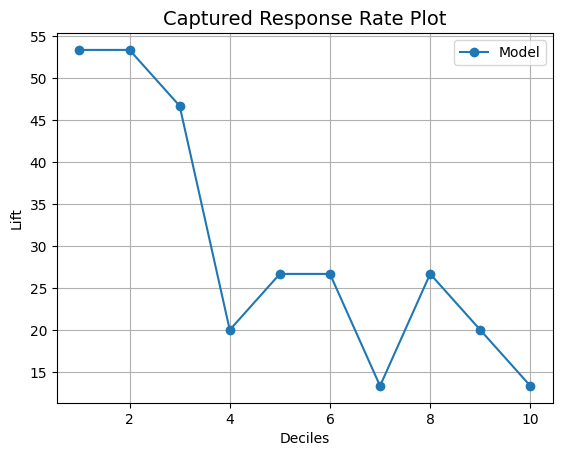

In [ ]:
stable_chart(lift_table_ADAM_32_TS) # Unstable

###ADAM_32_SD

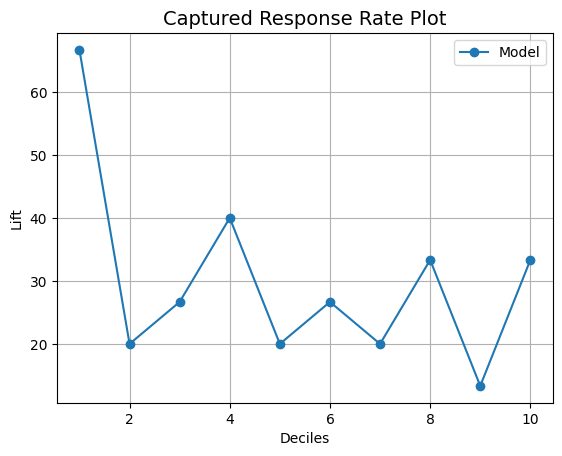

In [ ]:
stable_chart(lift_table_ADAM_32_SD) # Stable

###ADAM_32_ES

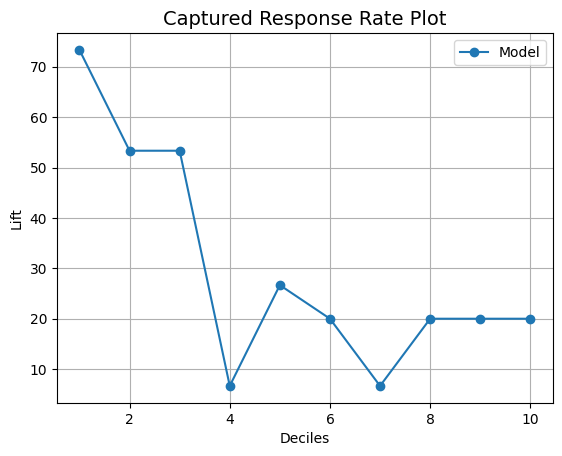

In [ ]:
stable_chart(lift_table_ADAM_32_ES) # Unstable

###ADAM_32_RP

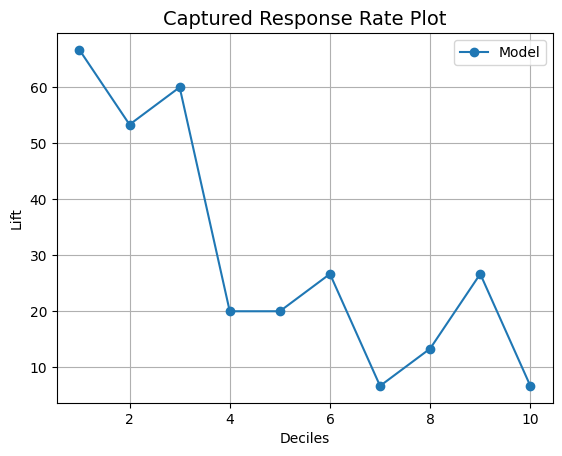

In [ ]:
stable_chart(lift_table_ADAM_32_RP) # Unstable

###ADAM_32_01

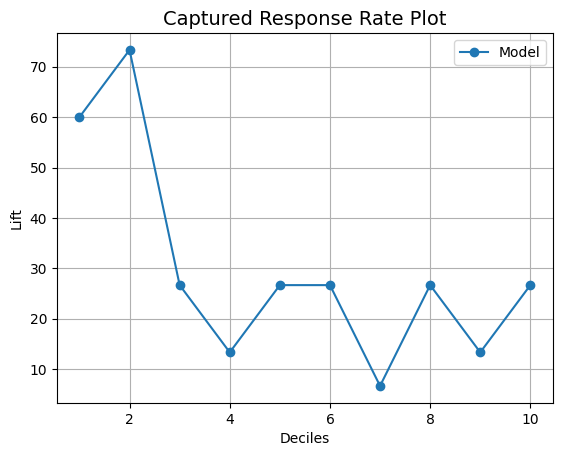

In [ ]:
stable_chart(lift_table_ADAM_32_01) # Stable

###ADAM_64_01

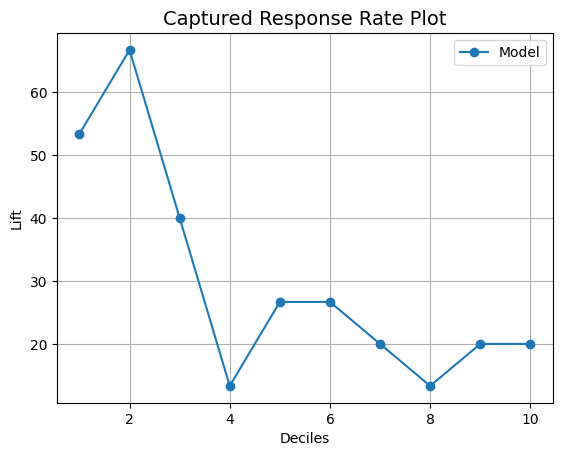

In [ ]:
stable_chart(lift_table_ADAM_64_01) # Stable

###SGD_32_01

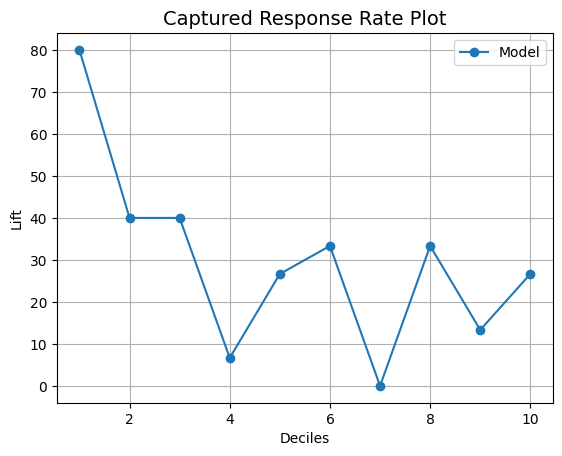

In [ ]:
stable_chart(lift_table_SGD_32_01) # Untable

###SGD_32_RP

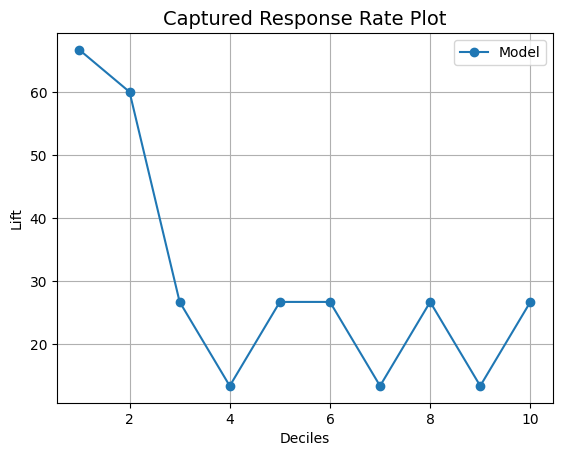

In [ ]:
stable_chart(lift_table_SGD_32_RP) # Stable

##Overall Score

Weights
* Accuracy – 45%
* Stability – 25%
* Lift – 30%

Thresholds
* Accuracy > 0.60
* Lift > 0.25
* Stability > 0.00

10% percentile for stability and lift.

In [ ]:
# Function for calculating the overall score
def calculate_overall_score(accuracy, stability, lift):
    # Calculate percentile thresholds
    stability_threshold = np.percentile(stability, 10)
    lift_threshold = np.percentile(lift, 10)

    # Calculate weighted scores
    if accuracy > 0.6:
      accuracy_score = accuracy * 0.45
    else:
      accuracy_score = 0

    if stability > stability_threshold:
      stability_score = stability * 0.25
    else:
      stability_score = 0

    if lift > lift_threshold:
      lift_score = lift * 0.30
    else:
      lift_score = 0

    # Calculate overall score
    overall_score = accuracy_score + stability_score + lift_score

    return overall_score

###ADAM_32_TS

In [ ]:
# Accuracy score
ADAM_32_TS_accuracy = accuracy_score(y_test,y_pred_ADAM_32_TS.round())

# Lift value
ADAM_32_TS_lift = lift_table_ADAM_32_TS['lift_value'].iloc[1]

# Stability score
ADAM_32_TS_stability = 0

# Overall score
overall_score = calculate_overall_score(ADAM_32_TS_accuracy, ADAM_32_TS_stability, ADAM_32_TS_lift)
print("Overall Score:", overall_score)

Overall Score: 0.321


###ADAM_32_SD

In [ ]:
# Accuracy score
ADAM_32_SD_accuracy = accuracy_score(y_test,y_pred_ADAM_32_SD.round())

# Lift value
ADAM_32_SD_lift = lift_table_ADAM_32_SD['lift_value'].iloc[1]

# Stability score
ADAM_32_SD_stability = 1

# Overall score
overall_score = calculate_overall_score(ADAM_32_SD_accuracy, ADAM_32_SD_stability, ADAM_32_SD_lift)
print("Overall Score:", overall_score)

Overall Score: 0.333


###ADAM_32_ES

In [ ]:
# Accuracy score
ADAM_32_ES_accuracy = accuracy_score(y_test,y_pred_ADAM_32_ES.round())

# Lift value
ADAM_32_ES_lift = lift_table_ADAM_32_ES['lift_value'].iloc[1]

# Stability score
ADAM_32_ES_stability = 0

# Overall score
overall_score = calculate_overall_score(ADAM_32_ES_accuracy, ADAM_32_ES_stability, ADAM_32_ES_lift)
print("Overall Score:", overall_score)

Overall Score: 0.34500000000000003


###ADAM_32_RP

In [ ]:
# Accuracy score
ADAM_32_RP_accuracy = accuracy_score(y_test,y_pred_ADAM_32_RP.round())

# Lift value
ADAM_32_RP_lift = lift_table_ADAM_32_RP['lift_value'].iloc[1]

# Stability score
ADAM_32_RP_stability = 0

# Overall score
overall_score = calculate_overall_score(ADAM_32_RP_accuracy, ADAM_32_RP_stability, ADAM_32_RP_lift)
print("Overall Score:", overall_score)

Overall Score: 0.348


###ADAM_32_01

In [ ]:
# Accuracy score
ADAM_32_01_accuracy = accuracy_score(y_test,y_pred_ADAM_32_01.round())

# Lift value
ADAM_32_01_lift = lift_table_ADAM_32_01['lift_value'].iloc[1]

# Stability score
ADAM_32_01_stability = 1

# Overall score
overall_score = calculate_overall_score(ADAM_32_01_accuracy, ADAM_32_01_stability, ADAM_32_01_lift)
print("Overall Score:", overall_score)

Overall Score: 0.342


###ADAM_64_01

In [ ]:
# Accuracy score
ADAM_64_01_accuracy = accuracy_score(y_test,y_pred_ADAM_64_01.round())

# Lift value
ADAM_64_01_lift = lift_table_ADAM_64_01['lift_value'].iloc[1]

# Stability score
ADAM_64_01_stability = 1

# Overall score
overall_score = calculate_overall_score(ADAM_64_01_accuracy, ADAM_64_01_stability, ADAM_64_01_lift)
print("Overall Score:", overall_score)

Overall Score: 0.33899999999999997


###SGD_32_01

In [ ]:
# Accuracy score
SGD_32_01_accuracy = accuracy_score(y_test,y_pred_SGD_32_01.round())

# Lift value
SGD_32_01_lift = lift_table_SGD_32_01['lift_value'].iloc[1]

# Stability score
SGD_32_01_stability = 0

# Overall score
overall_score = calculate_overall_score(SGD_32_01_accuracy, SGD_32_01_stability, SGD_32_01_lift)
print("Overall Score:", overall_score)

Overall Score: 0.342


###SGD_32_RP

In [ ]:
# Accuracy score
SGD_32_RP_accuracy = accuracy_score(y_test,y_pred_SGD_32_RP.round())

# Lift value
SGD_32_RP_lift = lift_table_SGD_32_RP['lift_value'].iloc[1]

# Stability score
SGD_32_RP_stability = 1

# Overall score
overall_score = calculate_overall_score(SGD_32_RP_accuracy, SGD_32_RP_stability, SGD_32_RP_lift)
print("Overall Score:", overall_score)

Overall Score: 0.342
